In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("C:\\Users\\Nikhila sri\\Downloads\\transactions (1).csv")
df

,t_date,cust_id,t_amt,services,products_used,city,state,t_details
0,06-26-2015,4007024,40.33,Exercise & Fitness,Cardio Machine Accessories,Clarksville,Tennessee,credit
1,05-26-2015,4006742,198.44,Exercise & Fitness,Weightlifting Gloves,Long Beach,California,credit
2,06-01-2015,4009775,5.58,Exercise & Fitness,Weightlifting Machine Accessories,Anaheim,California,credit
3,06-05-2015,4002199,198.19,Gymnastics,Gymnastics Rings,Milwaukee,Wisconsin,credit
4,12-17-2015,4002613,98.81,Team Sports,Field Hockey,Nashville,Tennessee,credit
...,...,...,...,...,...,...,...,...
49995,09-18-2015,4005664,53.95,Games,Dice Games,Irving,Texas,credit
49996,10-02-2015,4007287,163.81,Games,Poker Chips & Sets,Kansas City,Missouri,credit
49997,05-03-2015,4003954,35.85,Racquet Sports,Squash,New Orleans,Louisiana,cash
49998,10-23-2015,4007843,180.41,Gymnastics,Vaulting Horses,Berkeley,California,credit


In [ ]:
#what is total sales amt across all transactions?
total_sales_amount=df['t_amt'].sum().round(2)
total_sales_amount

np.float64(5110820.54)

In [18]:
#which month has highest total transaction amount

# Convert date column to datetime
df['t_date'] = pd.to_datetime(df['t_date'], errors='coerce')

# Extract month name
df['month'] = df['t_date'].dt.month_name()

# Calculate total transaction amount per month
monthly_sales = df.groupby('month')['t_amt'].sum()

# Find month with highest total transaction amount
highest_month = monthly_sales.idxmax()
highest_amount = monthly_sales.max()

print("Month with highest total transaction amount:", highest_month)
print("Total Transaction Amount:", highest_amount)


Month with highest total transaction amount: March
Total Transaction Amount: 444664.24


In [21]:
#what is the average transaction amount per customer?
avg_transaction_amt_per_customer=df.groupby('cust_id')['t_amt'].mean()
avg_transaction_amt_per_customer

cust_id
4000000    127.444000
4000001    108.945556
4000002     56.165000
4000003    123.670000
4000004    168.135000
              ...    
4009995     65.018571
4009996    104.515000
4009997    121.547500
4009998    110.950000
4009999     85.252500
Name: t_amt, Length: 9926, dtype: float64

<Axes: title={'center': 'Total sales amount per month'}, xlabel='month'>

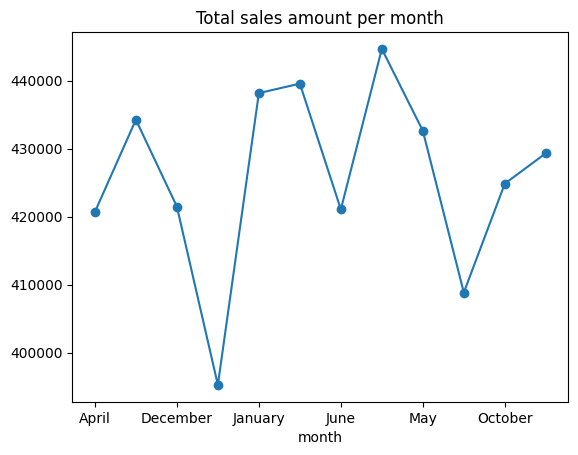

In [29]:
#what is the trend of total sales over months?

monthly_sales.plot(kind='line',marker='o',title='Total sales amount per month')

In [30]:
#what is the highest single transaction amt recorded?
highest_transaction=df['t_amt'].max()
highest_transaction

np.float64(200.0)

In [31]:
#which service category contributes the most to total revenues?
service_revenue = df.groupby('services')['t_amt'].sum().sort_values(ascending=False)
print(service_revenue.head())


services
Outdoor Recreation    846678.64
Exercise & Fitness    766463.87
Team Sports           617461.38
Water Sports          531815.97
Games                 374932.70
Name: t_amt, dtype: float64


In [32]:
#which product generated the highest revenue?
product_revenue = df.groupby('products_used')['t_amt'].sum().sort_values(ascending=False)
print(product_revenue.head())


products_used
Yoga & Pilates                47804.94
Swing Sets                    47204.14
Lawn Games                    46828.44
Golf                          46577.68
Cardio Machine Accessories    46485.54
Name: t_amt, dtype: float64


In [33]:
#how does the transaction amount vary between the services?
avg_service_amt = df.groupby('services')['t_amt'].mean()
print(avg_service_amt)


services
Air Sports                103.455104
Combat Sports             101.061761
Dancing                   102.907512
Exercise & Fitness        103.660247
Games                     102.272968
Gymnastics                102.385901
Indoor Games              103.074684
Jumping                   102.155171
Outdoor Play Equipment    101.281196
Outdoor Recreation        100.999480
Puzzles                   100.595997
Racquet Sports            103.647461
Team Sports               102.738998
Water Sports              101.899975
Winter Sports             101.217718
Name: t_amt, dtype: float64


In [34]:
# how many unique customers made purchases?
unique_customers = df['cust_id'].nunique()
print(unique_customers)


9926


In [35]:
# which customers have spent the most overall?
top_customers = df.groupby('cust_id')['t_amt'].sum().sort_values(ascending=False).head(10)
print(top_customers)


cust_id
4009485    1973.30
4006425    1732.09
4000221    1671.47
4003228    1640.63
4006606    1628.94
4006467    1605.95
4004927    1576.71
4008321    1560.79
4000815    1557.82
4001051    1488.67
Name: t_amt, dtype: float64


In [36]:
# what is the average number of transactions per customer?
avg_txn_customer = df.groupby('cust_id').size().mean()
print(avg_txn_customer)


5.037275841225066


In [37]:
# are there customers who made multiple purchases in different categories?
multi_cat = df.groupby('cust_id')['services'].nunique()
multi_cat_customers = multi_cat[multi_cat > 1]
print(len(multi_cat_customers))


9488


In [38]:
# what percentage of customers are repeat buyers?
repeat_buyers = (df.groupby('cust_id').size() > 1).mean() * 100
print(repeat_buyers)


96.5645778762845


In [39]:
# which product category has the highest total sales?
category_sales = df.groupby('services')['t_amt'].sum().sort_values(ascending=False)
print(category_sales)


services
Outdoor Recreation        846678.64
Exercise & Fitness        766463.87
Team Sports               617461.38
Water Sports              531815.97
Games                     374932.70
Gymnastics                327225.34
Winter Sports             321973.56
Outdoor Play Equipment    294728.28
Indoor Games              288506.04
Jumping                   205842.67
Racquet Sports            166976.06
Combat Sports             164730.67
Air Sports                 99316.90
Puzzles                    61564.75
Dancing                    42603.71
Name: t_amt, dtype: float64


In [40]:
# which services are most popular by transaction count?
popular_services = df['services'].value_counts()
print(popular_services)


services
Outdoor Recreation        8383
Exercise & Fitness        7394
Team Sports               6010
Water Sports              5219
Games                     3666
Gymnastics                3196
Winter Sports             3181
Outdoor Play Equipment    2910
Indoor Games              2799
Jumping                   2015
Combat Sports             1630
Racquet Sports            1611
Air Sports                 960
Puzzles                    612
Dancing                    414
Name: count, dtype: int64


In [41]:
#Most frequent product per service?
service_product = df.groupby(['services','products_used']).size().reset_index(name='count')
top_products_service = service_product.sort_values(['services','count'], ascending=[True, False])
print(top_products_service)


          services    products_used  count
2       Air Sports       Parachutes    400
1       Air Sports     Hang Gliding    369
0       Air Sports        Air Suits    191
3    Combat Sports           Boxing    431
6    Combat Sports        Wrestling    412
..             ...              ...    ...
124  Winter Sports      Snowshoeing    409
121  Winter Sports         Sledding    395
123  Winter Sports     Snowmobiling    380
122  Winter Sports     Snowboarding    374
119  Winter Sports  Downhill Skiing    362

[125 rows x 3 columns]


In [42]:
#Average transaction per product?
avg_product_amt = df.groupby('products_used')['t_amt'].mean()
print(avg_product_amt)


products_used
Abdominal Equipment    105.362798
Air Hockey             103.775478
Air Suits              101.421832
Archery                 97.345564
Badminton              108.441138
                          ...    
Wetsuits               102.042775
Whitewater Rafting     102.877744
Windsurfing            104.161453
Wrestling               97.895364
Yoga & Pilates         107.668784
Name: t_amt, Length: 125, dtype: float64


In [43]:
#Services where customers spend more?
avg_service_amt = df.groupby('services')['t_amt'].mean().sort_values(ascending=False)
print(avg_service_amt)


services
Exercise & Fitness        103.660247
Racquet Sports            103.647461
Air Sports                103.455104
Indoor Games              103.074684
Dancing                   102.907512
Team Sports               102.738998
Gymnastics                102.385901
Games                     102.272968
Jumping                   102.155171
Water Sports              101.899975
Outdoor Play Equipment    101.281196
Winter Sports             101.217718
Combat Sports             101.061761
Outdoor Recreation        100.999480
Puzzles                   100.595997
Name: t_amt, dtype: float64


In [44]:
#State with highest total sales?
state_sales = df.groupby('state')['t_amt'].sum().sort_values(ascending=False)
print(state_sales.head())


state
California    702346.23
Texas         541267.24
Florida       274858.95
Ohio          188613.87
Oregon        187052.05
Name: t_amt, dtype: float64


In [46]:
#City with highest transaction count?
city_txn = df['city'].value_counts()
print(city_txn.head())


city
Pasadena       939
Columbia       920
Kansas City    912
Columbus       906
Buffalo        507
Name: count, dtype: int64


In [47]:
#Average spending per state?
avg_state_spend = df.groupby('state')['t_amt'].mean()
print(avg_state_spend)


state
Alabama                 102.487049
Arizona                 102.172241
California              102.652182
Colorado                101.537415
Connecticut              99.982108
District of Columbia    103.800334
Florida                 103.136567
Georgia                 102.330675
Hawaii                  101.536667
Idaho                    98.969538
Illinois                100.166315
Indiana                 100.712664
Iowa                    103.100727
Kansas                  101.436926
Kentucky                104.130392
Louisiana               103.466335
Maryland                100.506913
Massachusetts           104.541571
Michigan                101.547777
Minnesota               103.465157
Mississippi             101.214926
Missouri                100.969040
Nebraska                101.955690
Nevada                  105.434718
New Jersey              103.438005
New York                100.259452
North Carolina          103.033172
Ohio                    101.350817
Oklahoma      

In [48]:
#Services popular in specific state?
state_service = df.groupby(['state','services']).size()
print(state_service)


state      services          
Alabama    Air Sports             21
           Combat Sports          44
           Dancing                 8
           Exercise & Fitness    160
           Games                  80
                                ... 
Wisconsin  Puzzles                15
           Racquet Sports         34
           Team Sports           152
           Water Sports          126
           Winter Sports          64
Length: 570, dtype: int64


In [49]:
#States buying most Outdoor Recreation?
outdoor_state = df[df['services']=="Outdoor Recreation"].groupby('state')['t_amt'].sum()
print(outdoor_state.sort_values(ascending=False))


state
California              120605.09
Texas                    81616.93
Florida                  47959.38
Oregon                   32892.83
Tennessee                31080.93
Ohio                     30917.35
Washington               29612.15
Colorado                 27605.07
Massachusetts            26458.03
Arizona                  24426.25
Illinois                 22933.09
Missouri                 22301.50
New Jersey               22091.40
Wisconsin                19378.03
Virginia                 18931.03
Alabama                  18197.03
Minnesota                17928.51
Kentucky                 16532.71
South Carolina           16050.35
Georgia                  15912.77
Kansas                   15869.04
Pennsylvania             15271.72
Nebraska                 14962.41
Connecticut              14592.22
North Carolina           14530.52
Nevada                   14427.91
New York                 14393.36
Utah                     14178.02
Michigan                 13883.05
Indiana 

In [50]:
#Compare California vs Texas spending?
df[df['state'].isin(['California','Texas'])].groupby('state')['t_amt'].mean()


state
California    102.652182
Texas         101.379891
Name: t_amt, dtype: float64

In [52]:
#Month-by-month sales variation?
monthly_sales = df.groupby('month')['t_amt'].sum()
print(monthly_sales)


month
April        420695.24
August       434255.01
December     421490.73
February     395262.37
January      438165.76
July         439560.80
June         421074.55
March        444664.24
May          432627.58
November     408846.35
October      424856.28
September    429321.63
Name: t_amt, dtype: float64


In [54]:
#Transactions per month?
monthly_txn = df.groupby('month').size()
print(monthly_txn)


month
April        4175
August       4250
December     4150
February     3834
January      4268
July         4252
June         4171
March        4360
May          4205
November     3994
October      4181
September    4160
dtype: int64


In [55]:
#Seasonal sports sales spike?
sports_month = df[df['services']=="Team Sports"].groupby('month')['t_amt'].sum()
print(sports_month)


month
April        53772.54
August       57153.34
December     46741.93
February     48418.82
January      52331.01
July         48666.12
June         52236.93
March        55662.86
May          52269.35
November     45426.10
October      51594.81
September    53187.57
Name: t_amt, dtype: float64


In [56]:
#Credit transaction count?
credit_txn = (df['t_details']=="credit").sum()
print(credit_txn)


43151


In [57]:
#Revenue from credit transactions?
credit_revenue = df[df['t_details']=="credit"]['t_amt'].sum()
print(credit_revenue)


4923134.93


In [58]:
#Average spending credit vs others?
payment_avg = df.groupby('t_details')['t_amt'].mean()
print(payment_avg)


t_details
cash       27.403360
credit    114.090865
Name: t_amt, dtype: float64


In [59]:
#Marketing Focus (High Value Locations)?
state_sales.head(5)
city_txn.head(5)



city
Pasadena       939
Columbia       920
Kansas City    912
Columbus       906
Buffalo        507
Name: count, dtype: int64

In [60]:
#Inventory Decision (Exercise & Fitness)?
df['services'].value_counts()


services
Outdoor Recreation        8383
Exercise & Fitness        7394
Team Sports               6010
Water Sports              5219
Games                     3666
Gymnastics                3196
Winter Sports             3181
Outdoor Play Equipment    2910
Indoor Games              2799
Jumping                   2015
Combat Sports             1630
Racquet Sports            1611
Air Sports                 960
Puzzles                    612
Dancing                    414
Name: count, dtype: int64

In [62]:
#High Sales but Low Avg Transaction Categories?
sales = df.groupby('services')['t_amt'].sum()
avg = df.groupby('services')['t_amt'].mean()

comparison = pd.concat([sales, avg], axis=1)
comparison.columns = ['Total Sales','Avg Transaction']
print(comparison)


                        Total Sales  Avg Transaction
services                                            
Air Sports                 99316.90       103.455104
Combat Sports             164730.67       101.061761
Dancing                    42603.71       102.907512
Exercise & Fitness        766463.87       103.660247
Games                     374932.70       102.272968
Gymnastics                327225.34       102.385901
Indoor Games              288506.04       103.074684
Jumping                   205842.67       102.155171
Outdoor Play Equipment    294728.28       101.281196
Outdoor Recreation        846678.64       100.999480
Puzzles                    61564.75       100.595997
Racquet Sports            166976.06       103.647461
Team Sports               617461.38       102.738998
Water Sports              531815.97       101.899975
Winter Sports             321973.56       101.217718


In [63]:
#Underperforming Service Categories?
service_revenue.sort_values()


services
Dancing                    42603.71
Puzzles                    61564.75
Air Sports                 99316.90
Combat Sports             164730.67
Racquet Sports            166976.06
Jumping                   205842.67
Indoor Games              288506.04
Outdoor Play Equipment    294728.28
Winter Sports             321973.56
Gymnastics                327225.34
Games                     374932.70
Water Sports              531815.97
Team Sports               617461.38
Exercise & Fitness        766463.87
Outdoor Recreation        846678.64
Name: t_amt, dtype: float64